# Persistant

주로 많이 사용하는 것이 open / pickle 을 사용하여 저장한다.


## flat file 

data files that contain records with no structured relationships between the records and there's also no structure for indexing. (txt, csv, tsv)
- text
  - the new line character (\n) is default EOL terminator.
- binary
  - no EOL character

## open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None) 

- open - text or byte stream(plat file)
- byte는 파일을 저장을 하거나 통신상 이용하는 기본 포맷, 기계를 위한 포맷
- 인코딩 된 것은 사람을 위한 포맷!
- 반드시 close를 해줘야 한다.

In [1]:
file = open('hello.txt', 'w')    
file.write('Hello, world!')
file.write("\nHello, 찬찬!")
file.close()               

In [12]:
import sys
sys.stdin.encoding

'949'

In [13]:
sys.stdout.encoding

'UTF-8'

### 만약 한글이 오류가 난다?
- open 시 encoding='utf-8' 옵션 넣어주기

In [15]:
open('hello.txt','rb',encoding='utf-8')

<_io.TextIOWrapper name='hello.txt' mode='r' encoding='utf-8'>

- enter, exit가 있으면 with 구문에 사용 할 수 있다.
- iter가 있으면 for in 뒤에 사용 가능하다. lazy 기법으로 하나씩 올릴 수 있다.

In [8]:
file2 = open('hello.txt','r')
next(file2)
# for i in file2:
#     print(i)

'Hello, world!\n'

| 파일 모드 	| 기능 	| 설명 	|
|-----------	|------------------------	|-------------------------------------------------------------------------------------------------------------------------------------------	|
| r 	| 읽기 전용 	| 파일을 읽기 전용으로 열기. 단, 파일이 반드시 있어야 하며 파일이 없으면 에러 발생 	|
| w 	| 쓰기 전용 	| 쓰기 전용으로 새 파일을 생성. 만약 파일이 있으면 내용을 덮어씀 	|
| a 	| 추가 	| 파일을 열어 파일 끝에 값을 이어 씀. 만약 파일이 없으면 파일을 생성 	|
| x 	| 배타적 생성(쓰기) 	| 파일을 쓰기 모드로 생성. 파일이 이미 있으면 에러 발생 	|
| r+ 	| 읽기/쓰기 	| 파일을 읽기/쓰기용으로 열기. 단, 파일이 반드시 있어야 하며 파일이 없으면 에러 발생 	|
| w+ 	| 읽기/쓰기 	| 파일을 읽기/쓰기용으로 열기. 파일이 없으면 파일을 생성하고, 파일이 있으면 내용을 덮어씀 	|
| a+ 	| 추가(읽기/쓰기) 	| 파일을 열어 파일 끝에 값을 이어 씀. 만약 파일이 없으면 파일을 생성. 읽기는 파일의 모든 구간에서 가능하지만, 쓰기는 파일의 끝에서만 가능함 	|
| x+ 	| 배타적 생성(읽기/쓰기) 	| 파일을 읽기/쓰기 모드로 생성. 파일이 이미 있으면 에러 발생 	|
| t 	| 텍스트 모드 	| 파일을 읽거나 쓸 때 개행 문자 \n과 \r\n을 서로 변환 	|
| b 	| 바이너리 모드 	| 파일의 내용을 그대로 읽고, 값을 그대로 씀 	|

### close는 모든 행동이 다 끝났을 때 해야 한다.

In [28]:
file = open('hello2.txt', 'w')    
file.close() 
file.write('Hello, world!')      

ValueError: I/O operation on closed file.

In [29]:
file = open('hello.txt', 'r')    
s = file.read()                  
print(s)                         
file.close()                     

Hello, world!


In [30]:
file = open('hello.txt', 'r')    
file.close()                     
s = file.read()                  
print(s)                         

ValueError: I/O operation on closed file.

가비지 컬렉션으로 자동으로 close를 해주지만,
너무 많이 열었는데 close 안해서 에러가 난다.

In [31]:
files = []
for _ in range(100000):
    files.append(open('foo.txt', 'w'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-bd12c407fa52>", line 3, in <module>
    files.append(open('foo.txt', 'w'))
OSError: [Errno 24] Too many open files: 'foo.txt'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1090, in get_records
  File "/usr/local/lib/python3.6/site-packages/IPython/core/ultratb.py", line 311, in wrapped
  File "/usr/local/lib/python3.6/

OSError: [Errno 24] Too many open files: 'foo.txt'

파이썬에는 사용이 끝난 메모리를 정리해주는 가비지 컬렉터가 있어서 파일을 닫지 않아도 가비지 컬렉터가 파일을 닫아줍니다. 하지만 프로그래머가 파일을 직접 닫아야 하는 이유는 다음과 같습니다.

- 너무 많은 파일을 열어 두면 그만큼 메모리 공간을 차지하므로 성능에 영향을 줄 수 있습니다.
- 파일을 닫지 않으면 데이터가 쓰기가 완료되지 않을 수도 있습니다. 운영체제는 파일을 처리할 때 성능을 위해서 데이터를 버퍼(임시 공간)에 저장한 뒤 파일에 씁니다. 때에 따라서는 파일이 닫히는 시점에 버퍼의 내용이 파일에 저장됩니다.
- 이론적으로 운영체제에서 열 수 있는 파일의 개수는 한계가 있습니다.
- 운영체제에 따라 파일을 열었을 때 파일을 잠금 상태로 처리하는 경우가 있습니다. 실질적으로 파일 처리가 끝났더라도 파일을 닫지 않으면 다른 프로그램에서 파일을 사용할 수 없는 상태가 됩니다.

보통은 파일을 닫지 않아도 큰 문제가 없습니다. 하지만 실무에서는 사소한 실수로도 큰 문제가 발생하는 경우가 있으므로 파일을 정확히 닫는 습관을 기르는 것이 좋습니다.

In [31]:
%%writefile sun.txt
When, in disgrace with fortune and men's eyes,
I all alone beweep my outcast state,
And trouble deaf heaven with my bootless cries,
And look upon myself and curse my fate,

Writing sun.txt


### iterator기 때문에, 실행하면 사라진다.

In [51]:
a = open('sun.txt') # iterator

In [36]:
a.read()    

"When, in disgrace with fortune and men's eyes,\nI all alone beweep my outcast state,\nAnd trouble deaf heaven with my bootless cries,\nAnd look upon myself and curse my fate,"

In [56]:
a.readline()

''

In [49]:
a.readlines()

["When, in disgrace with fortune and men's eyes,\n",
 'I all alone beweep my outcast state,\n',
 'And trouble deaf heaven with my bootless cries,\n',
 'And look upon myself and curse my fate,']

In [23]:
b = open('sun.txt')

In [26]:
b.readline()

'And trouble deaf heaven with my bootless cries,\n'

## with
- enter와 exit 메소드가 있기에 사용 가능.
- 종료될 때 자동으로 close

In [59]:
with open('sun.txt', 'r') as file:    
    s = file.read()                 
    print(s)      

When, in disgrace with fortune and men's eyes,
I all alone beweep my outcast state,
And trouble deaf heaven with my bootless cries,
And look upon myself and curse my fate,


In [60]:
with open('sun2.txt', 'w') as file: 
    for i in range(3):
        file.write('Hello, world! {0}\n'.format(i))

In [61]:
lines = ['문근영\n', 'only one.\n']
 
with open('moon.txt', 'w') as file: 
    file.writelines(lines)

In [62]:
with open('moon.txt', 'r') as file:    
    lines = file.readlines()
    print(lines)

['문근영\n', 'only one.\n']


In [37]:
with open('moon.txt', 'r') as file:    
    line = file.readline()
    print(line.strip('\n'))        
    while line != '':
        line = file.readline()
        print(line.strip('\n'))    

문근영
only one.



In [39]:
with open('moon.txt', 'r') as file:   
    for i in file:
        print(i, end='')

문근영
only one.


In [ ]:
class File:
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode

    def __enter__(self):
        self.open_file = open(self.filename, self.mode)
        return self.open_file

    def __exit__(self, *args):
        self.open_file.close()

files = []
for _ in range(10000):
    with File('foo.txt', 'w') as infile:
        infile.write('foo')
        files.append(infile)

| 메서드 	| 설명 	|
|--------------------------	|------------------------------------------------------------------------	|
| read([n]) 	| 파일에서 문자열을 읽음 	|
| write(string or byte_string)	| 파일에 문자열을 씀 	|
| readline([n]) 	| 파일의 내용을 한 줄 읽음 	|
| readlines() 	| 파일의 내용을 한 줄씩 읽어서 리스트로 가져옴 	|
| writelines(문자열리스트) 	| 파일에 리스트의 문자열을 씀, 리스트의 각 문자열에는 \n을 붙여주어야 함 	|

## pickle
- 정말 많이 사용한다.
- 하지만 엄청난 단점이 있다네????
- 자료구조형태를 저장할 수 있음
- dump, load, dumps 세가지 메소드만 알면 됨ㅋㅋ


### file로 된 json은 open이 가능하다.

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# 20180717 필기"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 이제는 조금더 범용적이고 많이 쓰는 것!\n",
    "- 어제 했던 거는 잊어도 돼"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "import requests\n",
    "from bs4 import BeautifulSoup"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 177,
   "metadata": {},
   "outputs": [],
   "source": [
    "headers = {\n",
    "    \"user-agent\":\"Mozilla/5.0 (iPad; CPU OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.1\"\n",
    "}\n",
    "\n",
    "params = {\n",
    "    \"q\":\"한글\"\n",
    "}\n",
    "url = \"http://www.google.com/search\""
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 178,
   "metadata": {},
   "outputs": [],
   "source": [
    "html = requests.get(url, params=params, heade
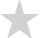
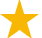
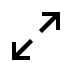
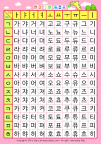
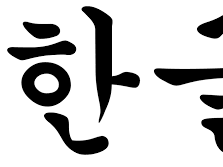
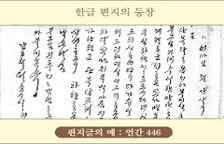
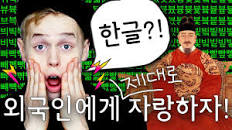
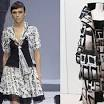

In [68]:
with open('20180717.ipynb', 'r',encoding='utf-8') as file:    
    s = file.read()                 
    print(s)      

In [70]:
name = '문근영'
scores = {'korean': 90, 'english': 95, 'mathematics': 85, 'science': 82}

In [71]:
import pickle

In [72]:
with open('moon.pickle', 'wb') as file:    # 확장자 마음대로
    pickle.dump(name, file)
    pickle.dump(scores, file)

객체의 직렬화!
- serialize interface 상속받는 것과 같은 느낌이야
1. 멀티 패러다임 

In [77]:
with open('moon.pickle', 'rb') as file:    
    name = pickle.load(file)
    scores = pickle.load(file)
    print(name)
    print(scores)

문근영
{'korean': 90, 'english': 95, 'mathematics': 85, 'science': 82}


In [79]:
with open('moon.pickle', 'rb') as file:    
    scores = pickle.load(file)
    name = pickle.load(file)
    print(name)
    print(scores)

{'korean': 90, 'english': 95, 'mathematics': 85, 'science': 82}
문근영


In [80]:
with open('moon.pickle', 'rb') as file:    
    scores = pickle.load(file)
    print(name)

{'korean': 90, 'english': 95, 'mathematics': 85, 'science': 82}


| 메서드 	| 설명 	|
|-----------------------------	|-----------------------------	|
| pickle.load(파일객체) 	| 파일에서 파이썬 객체를 읽음 	|
| pickle.dump(객체, 파일객체) 	| 파일에 파이썬 객체를 저장 	|

dumps
- byte string 형태로 변환시켜준다
- 사람이 읽을 수 있게! 

In [82]:
todo = ['write blog post', 'reply to email', 'read in a book']
pickled_data = pickle.dumps(todo)
print(pickled_data)

b'\x80\x03]q\x00(X\x0f\x00\x00\x00write blog postq\x01X\x0e\x00\x00\x00reply to emailq\x02X\x0e\x00\x00\x00read in a bookq\x03e.'


In [85]:
restored_data = pickle.loads(pickled_data)

In [86]:
restored_data

['write blog post', 'reply to email', 'read in a book']

In [97]:
import pickle
 
name = 'Abder'
website = 'http://abder.io'
english_french = {'paper':'papier', 'pen':'stylo', 'car':'voiture'} # dictionary
tup = (31,'abder',4.0) # tuple
 
pickled_file = open('pickled_file.pickle', 'wb')
pickle.dump(name, pickled_file)
pickle.dump(website, pickled_file)
pickle.dump(english_french, pickled_file)
pickle.dump(tup, pickled_file)
pickled_file.close()

In [96]:
from pickle import Pickler
 
name = 'Abder'
website = 'http://abder.io'
english_french = {'paper':'papier', 'pen':'stylo', 'car':'voiture'} # dictionary
tup = (31,'abder',4.0) # tuple
 
pickled_file = open('pickled_file.pickle', 'wb')
p = Pickler(pickled_file)
p.dump(name); p.dump(website); p.dump(english_french); p.dump(tup)
pickled_file.close()

In [98]:
import pickle
 
pickled_file = open('pickled_file.pickle', 'rb')
 
name = pickle.load(pickled_file)
website = pickle.load(pickled_file)
english_french = pickle.load(pickled_file)
tup = pickle.load(pickled_file)
 
print('Name: ')
print(name)
print('Website:')
print(website)
print('Englsh to French:')
print(english_french)
print('Tuple data:')
print(tup)

Name: 
Abder
Website:
http://abder.io
Englsh to French:
{'paper': 'papier', 'pen': 'stylo', 'car': 'voiture'}
Tuple data:
(31, 'abder', 4.0)


In [91]:
from pickle import Unpickler
 
pickled_file = open('pickled_file.pickle', 'r')
u = Unpickler(pickled_file)
name = u.load(); website = u.load(); english_french = u.load(); tup = u.load()
 
print('Name: ')
print(name)
print('Website:')
print(website)
print('English to French:')
print(english_french)
print('Tuple data:')
print(tup)

Name: 
Abder
Website:
http://abder.io
English to French:
{'paper': 'papier', 'pen': 'stylo', 'car': 'voiture'}
Tuple data:
(31, 'abder', 4.0)


------

------

In [16]:
import requests

In [21]:
data = requests.get("http://ppomppu.co.kr/")

data.content - byte


In [22]:
data.content

b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03\xed\xbd\xfb{\x13G\xb20\xfcsx\x9e\xfc\x0f\x8dv\x89\xcd\x89\xad\xab\xaf\x80\x9dC\x80d\xf3nnga/\xe7\xe3\xf8\xf5+Kc[A\xd2h%\x19\xf0\xee&\xff\x8b\x97K6\x10\xcc\x08I\xf6\xe8>cY\x1a\x93\x18;\x10\xc2\xc5$\x90\xb0\x80a\x1d\xbcpH\x8c7\x81}\xbe\xaa\x9e\xd1\xfd\xea\x9b0N\x9c\xd8H3\xdd\xd5\xdd\xd5U\xd5U\xd5\xd5\xd5;6\xef~g\xd7\xbe\xff~w\x0f\xe9w\xdb\xac\xe4\xdd\xdf\xbe\xfa\xe6\x1b\xbb\x88\xaaQ\xa3\xf9\xbda\x97F\xb3{\xdfn\xf2\x87_\xed{\xebM\xa2Sk\xc9>\xa7\xd1\xee\xb2\xb8-\xac\xddh\xd5h\xf6\xbc\xad"\xaa~\xb7\xdb\xb1M\xa39t\xe8\x90\xfa\x90A\xcd:\xfb4\xfb~\xa39\x8c\xb0tXY\xf9\xd8\xe8\xce\xaa\xa96\xbb\xcd\xaa\xceM;\xf0\r\xfe\xc3\x18\xcd\xf0\x8f\x8dq\x1b\tBkd\xfe8`9\xd8\xa1\xda\xc5\xda\xdd\x8c\xdd\xdd\xb8o\xd0\xc1\xa8\x88I\xfe\xd6\xa1r3\x87\xdd\x1a\xac\xba\x9d\x98\xfa\x8dN\x17\xe3\xee`\x06L\x8d\x07\x9c*\xa2)\x07f\xaf\xc9iq\x14\x87\xf6\x9e\xf1\xa0\xd1E_W\x82\xe1\x1e\xb42EA\x98\\\xae\x12u\xff\xd0\xf8\xdb\x9d\x8d\xbbX\x9b\xc3\xe8\xb6\xf4X\xb3+\xbe\xb1\xa7\x831\xf71

In [23]:
data.encoding

'euc-kr'

In [24]:
!pip install chardet

distributed 1.21.8 requires msgpack, which is not installed.


In [25]:
import chardet

In [30]:
chardet.detect(data.content)

{'encoding': None, 'confidence': 0.0, 'language': None}